In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def main():
    # 画像を読み込む
    img = Image.open('Takaaki Tsurumi.jpg')
    # グレイスケールに変換する
    gray_img = img.convert('L')
    # NumPy 配列にする
    f_xy = np.asarray(gray_img)

    # print(f_xy)

    f_uv = np.fft.ifft2(f_xy)

    # 2 次元高速フーリエ変換で周波数領域の情報を取り出す
    f_uv = np.fft.fft2(f_xy)
    # 画像の中心に低周波数の成分がくるように並べかえる
    shifted_f_uv = np.fft.fftshift(f_uv)

    # パワースペクトルに変換する
    magnitude_spectrum2d = 20 * np.log(np.absolute(shifted_f_uv))

    # 元の並びに直す
    unshifted_f_uv = np.fft.fftshift(shifted_f_uv)
    # 2 次元逆高速フーリエ変換で空間領域の情報に戻す
    i_f_xy = np.fft.ifft2(unshifted_f_uv).real  # 実数部だけ使う

    # 上記を画像として可視化する
    fig, axes = plt.subplots(1, 3, figsize=(8, 4))
    # 枠線と目盛りを消す
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
    # 元画像
    axes[0].imshow(f_xy, cmap='gray')
    axes[0].set_title('Input Image')
    # 周波数領域のパワースペクトル
    axes[1].imshow(magnitude_spectrum2d, cmap='gray')
    axes[1].set_title('Magnitude Spectrum')
    # FFT -> IFFT した画像
    axes[2].imshow(i_f_xy, cmap='gray')
    axes[2].set_title('Reversed Image')
    # グラフを表示する
    plt.show()

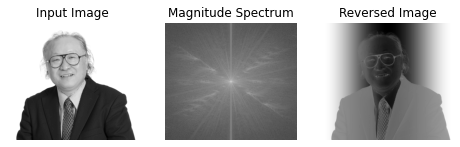

In [6]:
if __name__ == '__main__':
    main()

In [8]:
img = Image.open('sample1.jpg')

In [9]:
gray_img = img.convert('L')

In [14]:
f_xy = np.asarray(gray_img)
print(f_xy)

[[38 82 68 ... 84 74 83]
 [74 69 51 ... 97 93 91]
 [80 85 70 ... 84 81 72]
 ...
 [96 91 82 ... 71 59 79]
 [72 83 81 ... 83 63 79]
 [70 96 96 ... 78 55 72]]


In [15]:
f_uv = np.fft.fft2(f_xy)
print(f_uv)

[[ 2.53930020e+07   +0.j         -1.13997593e+06 -102.68278049j
   6.42561213e+04 +197.99436307j ... -2.47876762e+05 -209.3231308j
   6.42561213e+04 -197.99436307j -1.13997593e+06 +102.68278049j]
 [-1.86195147e+06 +236.538227j    5.76135714e+05 -177.50515962j
   6.78977125e+04 -472.59768185j ...  1.54423639e+05 +639.14531353j
  -7.54952657e+04 -499.53426862j  3.74090350e+05-1176.88216986j]
 [-6.70340139e+04 +358.63853197j -1.67473964e+05 +615.36115952j
   2.43625535e+05 -105.91490907j ... -2.94449435e+04 -926.94729929j
   1.53757133e+04 -524.22306168j -3.79031715e+05  -16.17876028j]
 ...
 [-2.02937448e+05 -493.41913184j  1.29294777e+05 -728.07920913j
  -2.39957120e+05 -243.72654437j ... -2.04683097e+04 +370.62187175j
  -2.35460158e+05 -184.72829025j  6.51790315e+02 +212.33839591j]
 [-6.70340139e+04 -358.63853197j -3.79031715e+05  +16.17876028j
   1.53757133e+04 +524.22306168j ... -2.30068165e+04 +290.67206338j
   2.43625535e+05 +105.91490907j -1.67473964e+05 -615.36115952j]
 [-1.861951

In [23]:
shifted_f_uv = np.fft.fftshift(f_uv)
print(shifted_f_uv)

[[ 4506.           +0.j          4611.8892307 -3123.59129649j
   5683.58678841+1296.76239421j ...  2234.48750947+1487.97399039j
   5683.58678841-1296.76239421j  4611.8892307 +3123.59129649j]
 [-2016.43746866 -287.60834168j  -791.84729997 +615.84043174j
  -6145.77738224+3044.30188791j ... -4730.21401494+1541.90049513j
  -3189.00595922-3987.19605929j  1124.1568288 +1330.38279627j]
 [-1542.12786777 +558.16383862j  3400.86443297-3361.06450054j
   -628.06726038+5706.27181291j ...  8532.0629796  -619.34128774j
  -2897.22146976-3468.00630872j  5143.69769654 -725.34945407j]
 ...
 [ -716.52762112-1522.41272465j -1575.95132995 -240.56112876j
  -4850.15792768 -168.97364284j ...  1063.66888687 -773.1493579j
   -589.39667428+2925.87239455j -3158.15503846-2557.72028484j]
 [-1542.12786777 -558.16383862j  5143.69769654 +725.34945407j
  -2897.22146976+3468.00630872j ...  3796.45336442 +469.98188764j
   -628.06726038-5706.27181291j  3400.86443297+3361.06450054j]
 [-2016.43746866 +287.60834168j  1124.156

In [17]:
magnitude_spectrum2d = 20 * np.log(np.absolute(shifted_f_uv))

In [18]:
unshifted_f_uv = np.fft.fftshift(shifted_f_uv)

In [19]:
i_f_xy = np.fft.ifft2(unshifted_f_uv).real

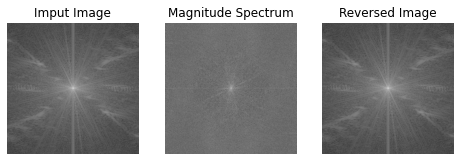

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

axes[0].imshow(f_xy, cmap = "gray")
axes[0].set_title("Imput Image")
axes[1].imshow(magnitude_spectrum2d, cmap = "gray")
axes[1].set_title("Magnitude Spectrum")
axes[2].imshow(i_f_xy, cmap = "gray")
axes[2].set_title("Reversed Image")

plt.show()

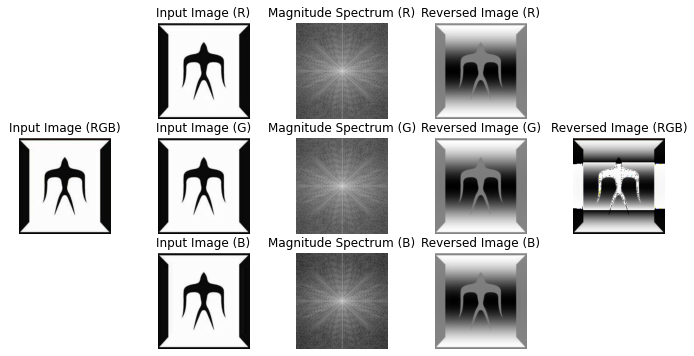

In [33]:
from itertools import chain

# 画像を読み込む
# img = Image.open('Takaaki Tsurumi.jpg')
# img = Image.open('df3f2e45252077.582aaa86acd94.png')
img = Image.open('titech.jpeg')
# NumPy 配列にする
f_xy_rgb = np.asarray(img)

# 画像として可視化する
fig, axes = plt.subplots(3, 5, figsize=(12, 6))
# 枠線と目盛りを消す
for ax in chain.from_iterable(axes):
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 元画像
axes[1][0].imshow(f_xy_rgb)
axes[1][0].set_title('Input Image (RGB)')

# 逆変換した画像を入れる領域を用意しておく
i_f_xy_rgb = np.empty_like(f_xy_rgb)
# RGB ごとに処理する
channel_names = ('R', 'G', 'B')
channel_indices = range(f_xy_rgb.shape[2])
zipped_channel_info = zip(channel_names, channel_indices)
for channel_name, channel_index in zipped_channel_info:
    # 各チャネルごとに配列として取り出す
    f_xy = f_xy_rgb[:, :, channel_index]

    # 各チャネルの元画像
    axes[channel_index][1].imshow(f_xy, cmap='gray')
    axes[channel_index][1].set_title(f'Input Image ({channel_name})')

    # 2 次元高速フーリエ変換で周波数領域の情報を取り出す
    f_uv = np.fft.fft2(f_xy)
    # 画像の中心に低周波数の成分がくるように並べかえる
    shifted_f_uv = np.fft.fftshift(f_uv)
    # パワースペクトルに変換する
    magnitude_spectrum2d = 20 * np.log(np.absolute(shifted_f_uv))
    # 元の並びに直す
    unshifted_f_uv = np.fft.fftshift(shifted_f_uv)
    # 2 次元逆高速フーリエ変換で空間領域の情報に戻す
    i_f_xy = np.fft.ifft2(unshifted_f_uv).real  # 実数部だけ使う

    # 周波数領域のパワースペクトル
    axes[channel_index][2].imshow(magnitude_spectrum2d, cmap='gray')
    axes[channel_index][2].set_title(f'Magnitude Spectrum ({channel_name})')

    # FFT -> Band-pass Filter -> IFFT した画像
    axes[channel_index][3].imshow(i_f_xy, cmap='gray')
    axes[channel_index][3].set_title(f'Reversed Image ({channel_name})')

    # 逆変換したチャネルを保存しておく
    i_f_xy_rgb[:, :, channel_index] = i_f_xy

# 逆変換した RGB 画像
axes[1][4].imshow(i_f_xy_rgb)
axes[1][4].set_title('Reversed Image (RGB)')

# グラフを表示する
plt.show()

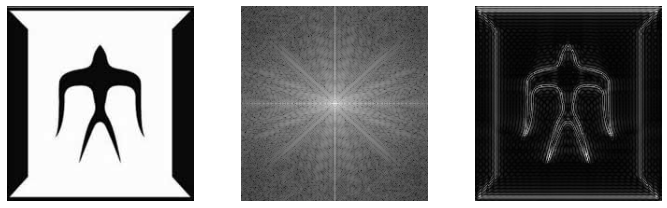

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 画像を読み込み、2Dフーリエ変換をする
img = cv2.imread('titech.jpeg', 0)           # 画像をグレースケールで読み込み
f = np.fft.fft2(img)                        # 2Dフーリエ変換
f_shift = np.fft.fftshift(f)                # 直流成分を画像中心に移動させるためN/2シフトさせる
mag = 20 * np.log(np.abs(f_shift))          # 振幅成分を計算

# 周波数領域にマスクをかける
rows, cols = img.shape                      # 画像サイズを取得
crow, ccol = int(rows / 2), int(cols / 2)   # 画像中心を計算
mask = 30                                   # マスクのサイズ
f_shift[crow-mask:crow+mask,
        ccol-mask:ccol+mask] = 0

# 2D逆フーリエ変換によりフィルタリング後の画像を得る
f_ishift = np.fft.ifftshift(f_shift)        # シフト分を元に戻す
img_back = np.fft.ifft2(f_ishift)           # 逆フーリエ変換
img_back = np.abs(img_back)                 # 実部を計算する

# ここからグラフ表示
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(img, cmap='gray')
ax2.imshow(mag, cmap='gray')
ax3.imshow(img_back, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.tight_layout()
plt.show()
plt.close()